# **Linear regression on the Boston House Prices dataset**

In this exercise, we performed some linear regression on the Boston House Prices dataset.

This dataset contains median house prices in different areas around Boston. For each area, we have some information about it, that we will use as our features. We want to train a linear regression model that predicts the price of a house given the input features.

We don't have direct access to the dataset from PyTorch, but the `scikit` library provides a version of it.


In [34]:
!pip install scikit-learn==1.1.0

In [35]:
# Import dataset
from sklearn.datasets import load_boston
import torch
import math
import numpy as np
from matplotlib import pyplot as plt

dataset = load_boston()

In [36]:
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [37]:
dataset['data'].shape

(506, 13)

In [38]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Computing the accuracy of the model.


In [39]:
def linreg(X, y, train_frac,plot_results=True):

    """
    Perform linear regression.

    Args:
    - X (torch.Tensor): Input features tensor.
    - y (torch.Tensor): Target variable tensor.
    - train_frac (float): Fraction of data to be used for training.

    """

    # Add a column of ones to X for the bias term
    ones = torch.ones(X.size(0), 1)
    X = torch.cat([ones, X], dim=1)

    # Compute number of training samples
    num_train = math.floor(X.size(0) * train_frac)
    num_test = X.size(0) - num_train

    # Set the seed for the randomness
    torch.manual_seed(1)

    # Shuffle indices
    indices = torch.randperm(X.size(0))

    # Select training samples
    X_train = X[indices[:num_train], :]
    y_train = y[indices[:num_train], :]

    # Select test samples
    X_test = X[indices[num_train:], :]
    y_test = y[indices[num_train:], :]

    # Estimate theta
    theta_est = torch.inverse(X_train.t() @ X_train) @ X_train.t() @ y_train

    # Print stuff
    print(f"Num. training samples: {num_train}")
    print(f"Num. test samples: {num_test}")
    print("----------------------------------")
    print("theta_est:", theta_est.squeeze())
    print("----------------------------------")

    # Compute MSE
    train_mse = torch.sum((y_train - X_train @ theta_est)**2) / num_train
    test_mse = torch.sum((y_test - X_test @ theta_est)**2) / num_test
    print(f"Train MSE: {train_mse.item()}")
    print(f"Test MSE:  {test_mse.item()}")

    # Compute MAE
    train_mae = torch.sum(torch.abs(y_train - X_train @ theta_est)) / num_train
    test_mae = torch.sum(torch.abs(y_test - X_test @ theta_est)) / num_test
    print(f"Train MAE: {train_mae.item()}")
    print(f"Test MAE:  {test_mae.item()}")
    if plot_results:
      # Plot data
      plt.scatter(X_train[:, 1].numpy(), y_train.numpy(), label="train", color="blue")
      plt.scatter(X_test[:, 1].numpy(), y_test.numpy(), label="test", color="orange")

      # Plot real and estimated lines
      x_values = torch.tensor([[1, X[:, 1].min().item()], [1, X[:, 1].max().item()]])
      est_y = x_values @ theta_est


      plt.plot([X[:, 1].min().item(), X[:, 1].max().item()], [est_y[0].item(), est_y[1].item()], label="est", color="red")

      plt.legend()
      plt.xlabel('NOX')  # Label for the x-axis
      plt.ylabel('MEDV')  # Label for the y-axis
      plt.show()


***Example using only one feature to examine some data***

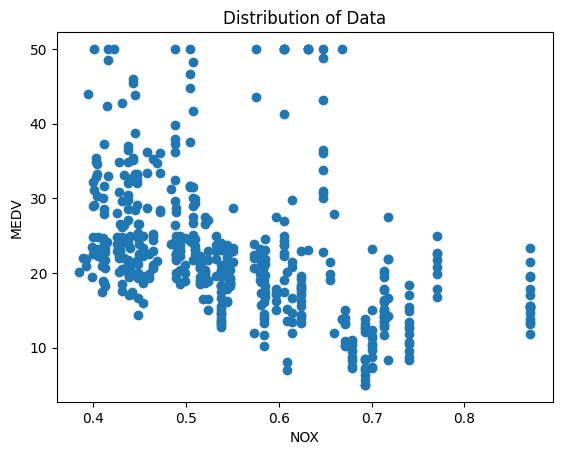

In [40]:
# Extract features and target from the dataset
X = torch.tensor(dataset['data'][:, 4], dtype=torch.float32).unsqueeze(1)  # Feature
y = torch.tensor(dataset['target'], dtype=torch.float32).unsqueeze(1)  # Target

train_frac = 0.7  # Training fraction

plt.scatter(X, y)
plt.title('Distribution of Data')  # Set the title of the plot
plt.xlabel('NOX')  # Label for the x-axis
plt.ylabel('MEDV')  # Label for the y-axis
plt.show()  # Display the plot

Num. training samples: 354
Num. test samples: 152
----------------------------------
theta_est: tensor([ 41.0709, -33.6144])
----------------------------------
Train MSE: 66.19891357421875
Test MSE:  75.58049774169922
Train MAE: 5.921736240386963
Test MAE:  5.988707542419434


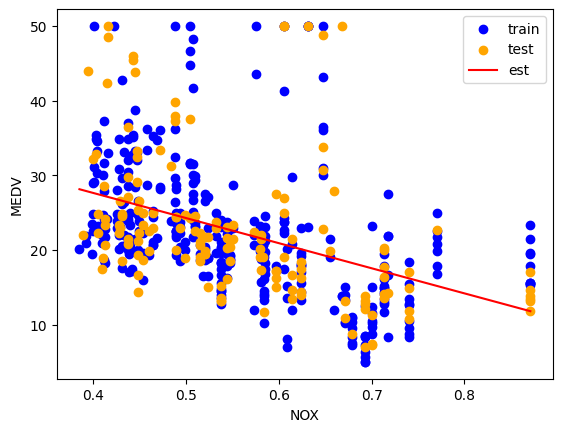

In [41]:
# Run
linreg(X, y,train_frac)

**SOME INFORMATION:**

Number of training samples: This represents the size of the training dataset, which contains 354 samples.

Number of test samples: This indicates the size of the test dataset, which consists of 152 samples.

Estimated parameters (theta_est): These are the coefficients estimated by the linear regression model. In this case, the estimated parameters are [41.0709, -33.6144]. These values represent the intercept and the coefficient for the feature used in the regression model.

Mean Squared Error (MSE) for the training set: The MSE measures the average squared difference between the actual and predicted values in the training set. In this case, the MSE for the training set is approximately 66.1989.

Mean Squared Error (MSE) for the test set: Similar to the MSE for the training set, this represents the average squared difference between the actual and predicted values in the test set. Here, the MSE for the test set is approximately 75.5805.

Mean Absolute Error (MAE) for the training set: The MAE calculates the average absolute difference between the actual and predicted values in the training set. For this dataset, the MAE for the training set is approximately 5.9217.

Mean Absolute Error (MAE) for the test set: Like the MAE for the training set, this measures the average absolute difference between the actual and predicted values in the test set. Here, the MAE for the test set is approximately 5.9887.

These metrics provide insights into how well the linear regression model fits the data and generalizes to unseen data. Lower values of MSE and MAE indicate better performance of the model.

## Feature analysis

### Correlations

One of the things we want to do is remove unnecessary features.

Feature correlation can be estimated using the Pearson correlation coefficient:

$$\text{corr}_{X_1,X_2} = \frac{\text{cov}(X_1,X_2)}{\sigma_{X_1} \sigma_{X_2}}$$

where $\text{cov}(X_1,X_2)$ is the covariance between features $X_1$ and $X_2$ (i.e., all values for that feature, from all observations), and $\sigma_X$ is the standard deviation of feature $X$.

All values $X_i$ are basically the columns of our data matrix. Given the vector `X_i` that contains all values for a feature, you can use the `X_i.std()` function to get the standard deviation of that vector.

To compute the covariance matrix, we are going to need to perform some computations.

Let's suppose your data matrix is `X`, where each row is an observation and each column is a feature.

First of all, we will need to compute a vector `X_mean`, where each element is the mean value for each feature. To do this, we will need to use the `torch.mean()` or the `Tensor.mean()` function.

From there, we have to subtract the mean vector to each observation in the data matrix.

Finally, if $N$ is the number of observation and `X_cent` is the data matrix where the mean vector has been subtracted, we can compute the covariance matrix $\Sigma$ as:

$$\Sigma = \frac{X_{\text{cent}}^T X_{\text{cent}}}{N-1}$$

Each element $\Sigma_{ij}$ is going to be equal to $\text{cov}(X_i,X_j)$. From those values and from the $\sigma_i$ values, we can compute the correlation matrix.

Finally, run some tests by:

- Computing the accuracy of your model when you remove/keep features that correlate with each other.
- Computing the accuracy of your model when you remove/keep features that correlate with the targets.

In [42]:
# SETUP
X = torch.tensor(dataset['data'], dtype=torch.float32)  # Features (all columns)
y = torch.tensor(dataset['target'], dtype=torch.float32).unsqueeze(1)  # Target (last column)

# Concatenate X and y along columns
newtensor = torch.cat((X, y), dim=1)

In [43]:
# Training fraction
train_frac = 0.7

# Run
linreg( X, y, train_frac,plot_results=False)

Num. training samples: 354
Num. test samples: 152
----------------------------------
theta_est: tensor([ 4.1057e+01, -1.5497e-01,  3.0479e-02,  3.0062e-02,  2.8769e-01,
        -1.6441e+01,  3.3263e+00, -7.0310e-03, -1.4534e+00,  3.8345e-01,
        -1.4642e-02, -1.0637e+00,  1.1884e-02, -5.4423e-01])
----------------------------------
Train MSE: 22.083894729614258
Test MSE:  23.817686080932617
Train MAE: 3.266329050064087
Test MAE:  3.4747040271759033


#Computing the accuracy of your model when you remove/keep features that correlate with each other.


Correlation Matrix:


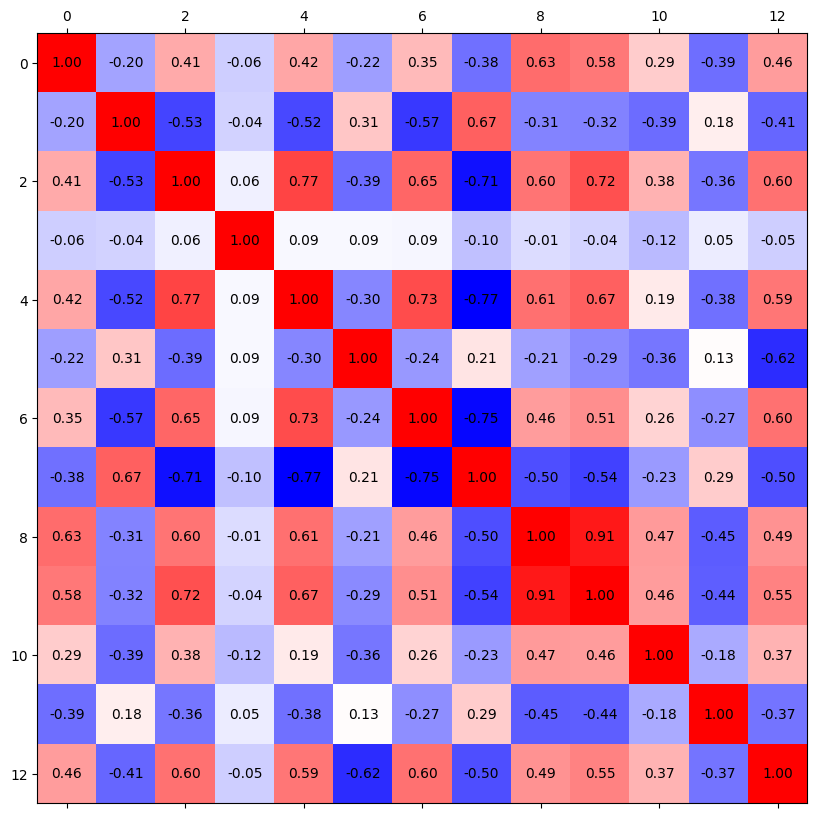

In [44]:
X = torch.tensor(dataset['data'], dtype=torch.float32)  # Features (all columns)
y = torch.tensor(dataset['target'], dtype=torch.float32).unsqueeze(1)  # Target (last column)

# 1. Calculate the mean vector for each feature
X_mean = torch.mean(X, dim=0)

# 2. Subtract the mean vector from each observation
X_cent = X - X_mean

# 3. Calculate the covariance matrix
covariance_matrix = torch.matmul(X_cent.T, X_cent) / (X.size(0) - 1)

# 4. Calculate the correlation matrix
std_dev = X_cent.std(dim=0, unbiased=False)
correlation_matrix = covariance_matrix / (std_dev.unsqueeze(0) * std_dev.unsqueeze(1))

print("Correlation Matrix:")

# Plot matrix
plt.figure(figsize=(10, 10))
ax = plt.gca()  # Get axis from figure
ax.matshow(correlation_matrix, cmap=plt.cm.bwr)  # Display the correlation matrix as a matrix

for i in range(correlation_matrix.size(0)):
    for j in range(correlation_matrix.size(1)):
        c = f"{correlation_matrix[i, j].item():.2f}"  # Format the correlation value to two decimal places
        ax.text(j, i, str(c), va='center', ha='center')  # Add text annotation to the plot

plt.show()


When we think about correlation thresholds, it's important to remember that they depend on what we're trying to achieve with your analysis and the specific details of the problem you're dealing with. Usually, if the correlation is higher than 0.7 or lower than -0.7, it means there's a strong connection. If it's between -0.3 and 0.3, it indicates a weak or unimportant link. So, when we're picking attributes, we might want to ignore the ones with really strong correlations (over 0.7 or under -0.7) to focus on the strongest connections. On the other hand, if we want to leave out attributes with weak connections, we could go for a threshold closer to 0.3 or -0.3.

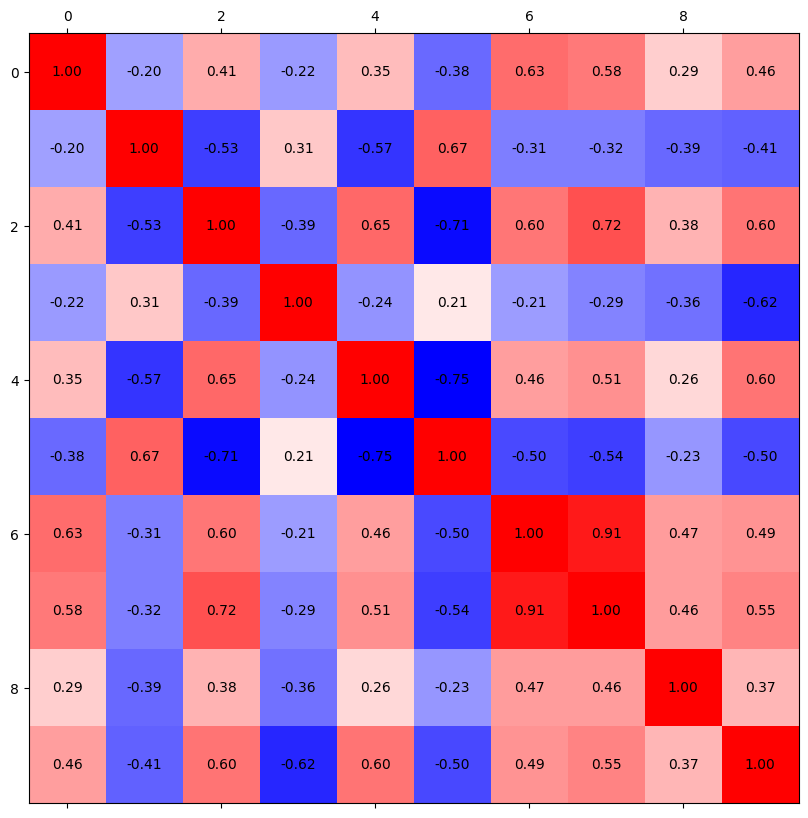

In [45]:
# Indices of attributes to keep
attributes_to_keep_indices = [0, 1, 2, 5, 6,7, 8,9 ,10, 12]

# Remove specified attributes
correlation_matrix = correlation_matrix[attributes_to_keep_indices][:, attributes_to_keep_indices]

# Plot matrix
plt.figure(figsize=(10, 10))
ax = plt.gca()  # Get axis from figure
ax.matshow(correlation_matrix, cmap=plt.cm.bwr)  # Display the correlation matrix as a matrix

for i in range(correlation_matrix.size(0)):
    for j in range(correlation_matrix.size(1)):
        c = f"{correlation_matrix[i, j].item():.2f}"  # Format the correlation value to two decimal places
        ax.text(j, i, str(c), va='center', ha='center')  # Add text annotation to the plot

plt.show()


In [46]:
# Select only the desired columns
X_selected = X[:, attributes_to_keep_indices]
y = torch.tensor(dataset['target'], dtype=torch.float32).unsqueeze(1)  # Target

# Options
train_frac = 0.7  # Training fraction

# Run
linreg( X_selected, y, train_frac,plot_results=False)


Num. training samples: 354
Num. test samples: 152
----------------------------------
theta_est: tensor([ 3.6190e+01, -1.4898e-01,  3.1679e-02, -6.4297e-02,  3.2211e+00,
        -1.9606e-02, -1.2076e+00,  2.9658e-01, -1.5871e-02, -8.7087e-01,
        -5.9520e-01])
----------------------------------
Train MSE: 23.89495849609375
Test MSE:  25.22403907775879
Train MAE: 3.405332088470459
Test MAE:  3.5194854736328125


# Computing the accuracy of your model when you remove/keep features that correlate with the targets.

Correlation Matrix:


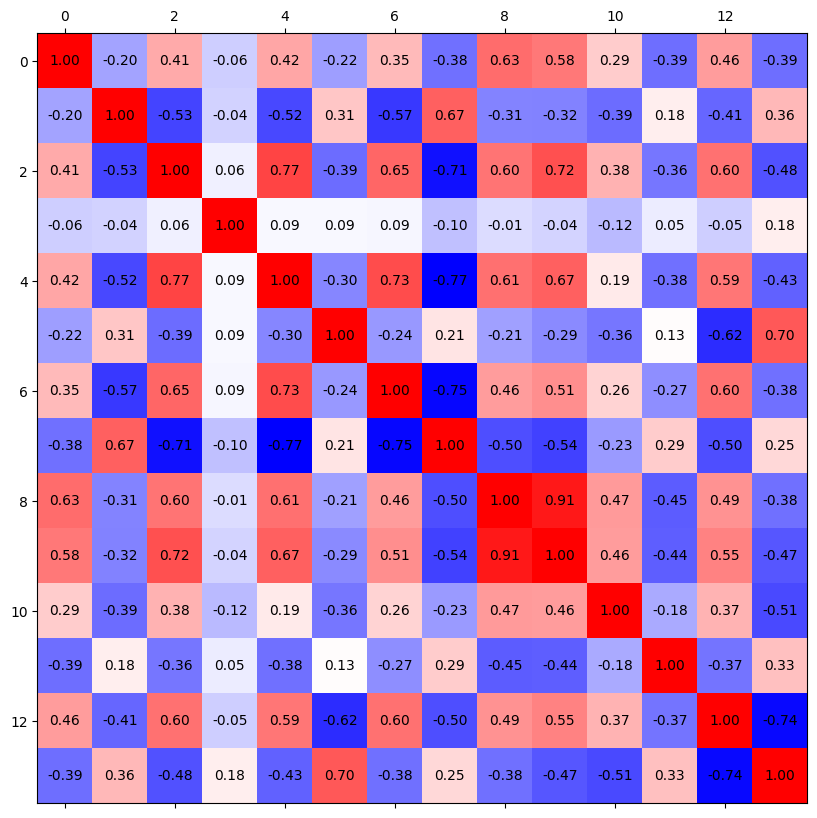

In [47]:
X = newtensor
y = torch.tensor(dataset['target'], dtype=torch.float32).unsqueeze(1)  # Target (last column)

# 1. Calculate the mean vector for each feature
X_mean = torch.mean(X, dim=0)

# 2. Subtract the mean vector from each observation
X_cent = X - X_mean

# 3. Calculate the covariance matrix
covariance_matrix = torch.matmul(X_cent.T, X_cent) / (X.size(0) - 1)

# 4. Calculate the correlation matrix
std_dev = X_cent.std(dim=0, unbiased=False)
correlation_matrix = covariance_matrix / (std_dev.unsqueeze(0) * std_dev.unsqueeze(1))

print("Correlation Matrix:")

# Plot matrix
plt.figure(figsize=(10, 10))
ax = plt.gca()  # Get axis from figure
ax.matshow(correlation_matrix, cmap=plt.cm.bwr)  # Display the correlation matrix as a matrix

for i in range(correlation_matrix.size(0)):
    for j in range(correlation_matrix.size(1)):
        c = f"{correlation_matrix[i, j].item():.2f}"  # Format the correlation value to two decimal places
        ax.text(j, i, str(c), va='center', ha='center')  # Add text annotation to the plot

plt.show()


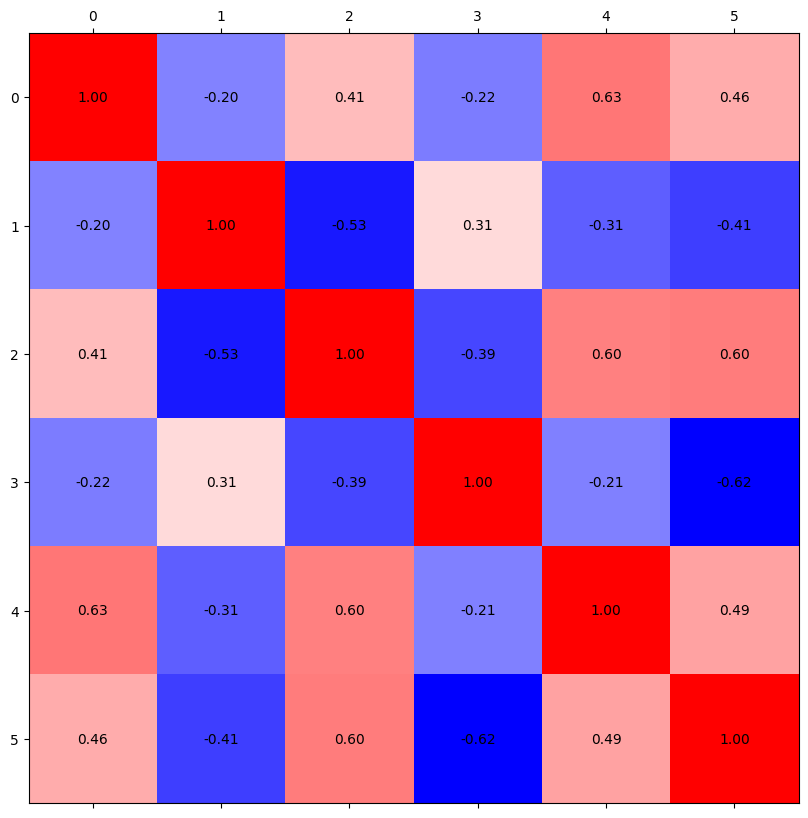

In [48]:
# Indices of attributes to keep
indices_to_keep = [0,1,2,5,8,12]  # Example: keep columns with even indices

# Remove the specified attributes
correlation_matrix = correlation_matrix[indices_to_keep][:, indices_to_keep]

# Plot matrix
plt.figure(figsize=(10, 10))
ax = plt.gca()  # Get axis from figure
ax.matshow(correlation_matrix, cmap=plt.cm.bwr)  # Display the correlation matrix as a matrix

for i in range(correlation_matrix.size(0)):
    for j in range(correlation_matrix.size(1)):
        c = f"{correlation_matrix[i, j].item():.2f}"  # Format the correlation value to two decimal places
        ax.text(j, i, str(c), va='center', ha='center')  # Add text annotation to the plot

plt.show()


In [49]:
# Select only the desired columns
X_selected = X[:, indices_to_keep]
y = torch.tensor(dataset['target'], dtype=torch.float32).unsqueeze(1)  # Target

# Options
train_frac = 0.7  # Training fraction

# Run
linreg( X_selected, y, train_frac,plot_results=False)

Num. training samples: 354
Num. test samples: 152
----------------------------------
theta_est: tensor([ 3.5408e+00, -1.1960e-01, -8.3745e-04, -7.8192e-02,  4.3523e+00,
         1.6739e-02, -5.8820e-01])
----------------------------------
Train MSE: 29.98093032836914
Test MSE:  30.777315139770508
Train MAE: 3.866502046585083
Test MAE:  3.946012020111084


# Conclusion

In conclusion, our investigation into feature elimination based on correlation analysis in linear regression reveals:


*   removing highly correlated features aims to streamline the model and enhance interpretability, it unexpectedly leads to an increase in Mean Squared Error (MSE) and Mean Absolute Error (MAE).
*   removing features with low correlation aims to optimize computational efficiency but may inadvertently impact model effectiveness.


Our regression analysis post-feature elimination underscores the complexity of model refinement, revealing trade-offs between interpretability and predictive accuracy. These findings emphasize the nuanced nature of feature selection in linear regression modeling and the need for careful consideration of the trade-offs involved.